In [2]:
"""
script to load sim and plot
"""

from netpyne import sim
from matplotlib import pyplot as plt
import os
import pickle as pkl
import numpy as np

In [3]:
FR_TC = []
vl = []

for ib in range(7,8):

    filename = 'v9_batch'+str(ib)  + '/' +'v9_batch'+str(ib) + '_0_0_data.pkl'

    sim.load(filename, instantiate=True, instantiateConns = False, instantiateStims = False, instantiateRxD = False, createNEURONObj = False)


    timeRange = [2000,6000]  # 'VPM_TC','ss_RTN_m', 
    binSize = 10
    sim.analysis.plotSpikeHist(include=[['presyn_VPM_sTC', 'presyn_VPM_TC']], binSize=binSize, figSize=(18, 6.0), fontSize = 12, legend=False, showFig= False,
                                        timeRange = timeRange, graphType = 'bar', measure = 'rate', linewidth=5, dpi=300, saveData=False, saveFig=False);

    SpikeHist = sim.analysis.prepareSpikeHist(include=[['presyn_VPM_sTC', 'presyn_VPM_TC']], timeRange = timeRange)
    aa, bb, = np.histogram(SpikeHist['spkTimes'],bins=range(timeRange[0],timeRange[1]+1,binSize))
    timefactor = binSize*1644/(1000)
    plt.plot(bb[1:]-binSize/2, aa/timefactor, 'c--')
    plt.show()
    FR_TC.append(aa/timefactor)

    # for val in sim.cfg.IClamp[2:]:
    #     vl.append(val['start'])
    # sim.analysis.plotRaster(**{'include': ['VPM_TC','ss_RTN_m','VPM_sTC'], 'saveFig': False, 'showFig': False, 'popRates': True,'orderInverse': True, 
    #                         'timeRange': timeRange, 'figSize': (8,4), 'fontSize':4, 'lw': 1, 'markerSize':1, 'marker': 'o', 'dpi': 200})
    
    # for pop in ['VPM_sTC', 'VPM_TC','ss_RTN_m']:
    #     sim.analysis.plotTraces(include= [pop], timeRange=timeRange, overlay=True, oneFigPer='trace', ylim=[-90,65], subtitles= True, axis=True, scaleBarLoc=1, 
    #                         figSize=(12, 4), fontSize=8, showFig=False, saveFig=False);


Start time:  2025-05-02 12:18:01.809418
Loading file v9_batch7/v9_batch7_0_0_data.pkl ... 
  Done; file loading time = 4.62 s
Loading simConfig...
Loading netParams...
Loading net...
  Created 33738 cells
  Created 0 connections
  Created 50190 stims
  Done; re-instantiate net time = 0.53 s
Loading simData...
Recording 0 traces of 0 types on node 0
Preparing spike data...
Plotting spike frequency...
Preparing spike data...


In [4]:
plt.figure(figsize=(12,3))
for i in range(1):
    plt.plot((bb[1:]-3000-binSize/2)/1000, FR_TC[i],'gray', alpha =0.25)
plt.plot((bb[1:]-3000-binSize/2)/1000, np.mean(FR_TC, axis=0),'k')
plt.ylabel('Spike frequency (Hz)', size= 15)
plt.xlabel('Time (s)', size= 15)
plt.yticks(size= 12)
plt.xlim(-0.5,2.5)
plt.vlines((np.array(vl)-3000)/1000, ymin=15,ymax = 20, color='blue', linestyles='dashed', alpha =0.25)
# plt.plot([2.0,2.0], [0,20],'--k')
plt.xticks(size= 12);

In [5]:
timeRange = [2000,6000] 

Preparing spike data...
Plotting raster...


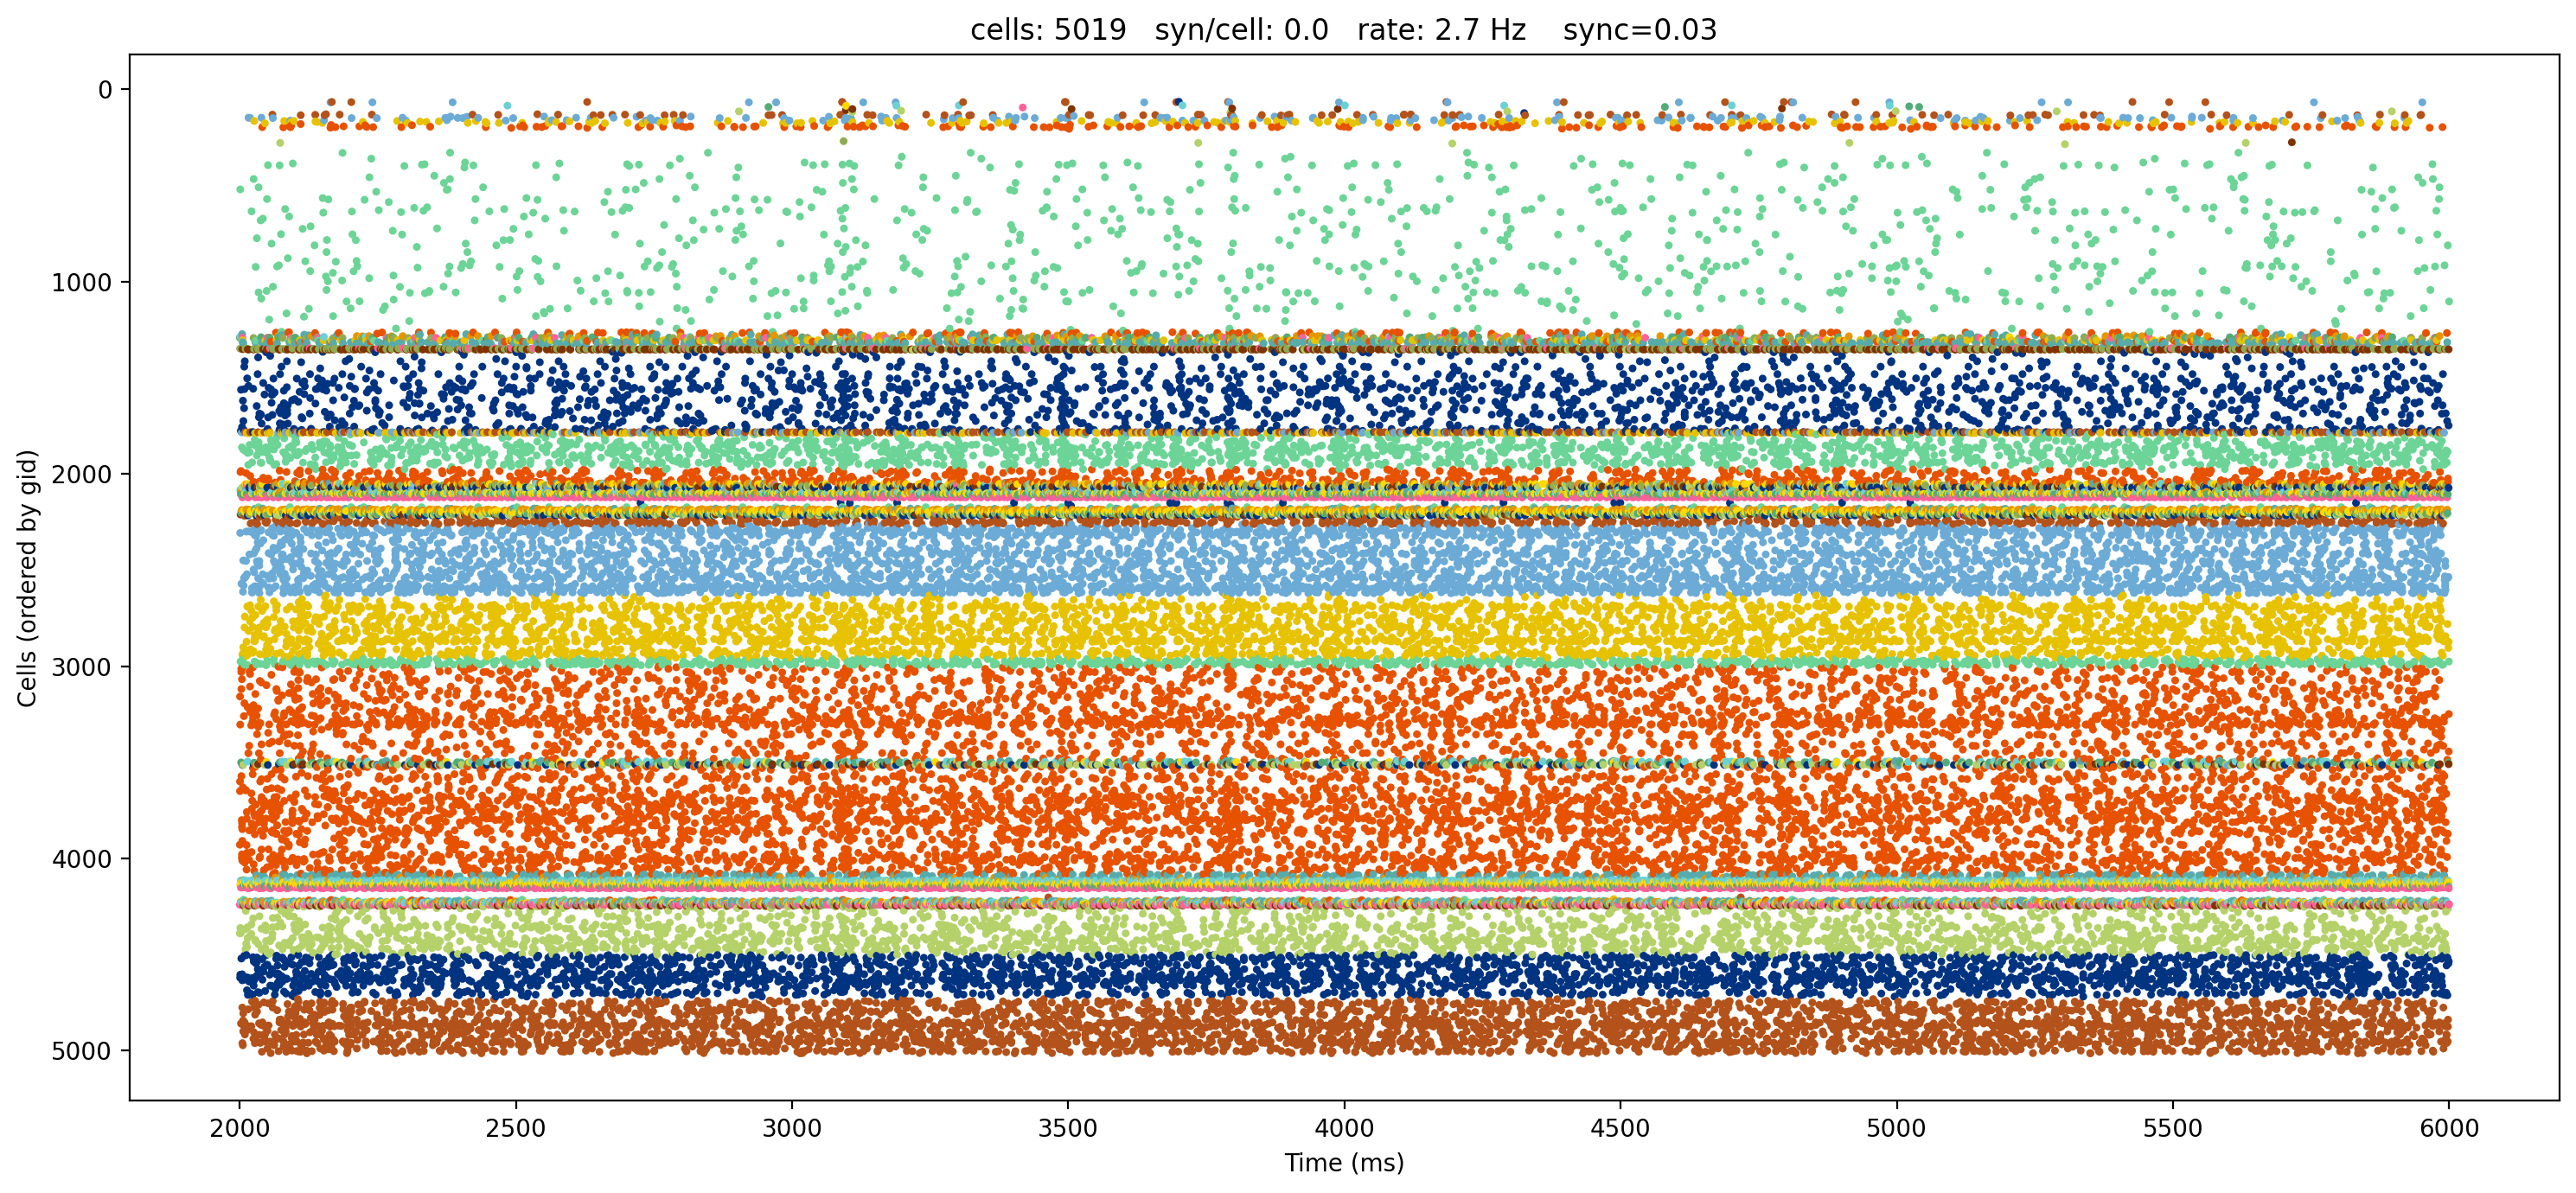

In [6]:
# 'presyn_VPL_sTC', 'presyn_VPM_sTC', 'presyn_POm_sTC_s1'
sim.analysis.plotRaster(**{'include': sim.cfg.S1cells, 'saveFig': False, 'showFig': False, 'popRates': True,'orderInverse': True, 'labels': None,
                           'timeRange': timeRange, 'figSize': (15,7), 'fontSize':4, 'lw': 1, 'markerSize':1, 'marker': 'o', 'dpi': 200})

Plotting recorded cell traces ... trace
Plotting recorded cell traces ... trace
Plotting recorded cell traces ... trace
Plotting recorded cell traces ... trace
Plotting recorded cell traces ... trace
Plotting recorded cell traces ... trace
Plotting recorded cell traces ... trace
Plotting recorded cell traces ... trace
Plotting recorded cell traces ... trace
Plotting recorded cell traces ... trace
Plotting recorded cell traces ... trace


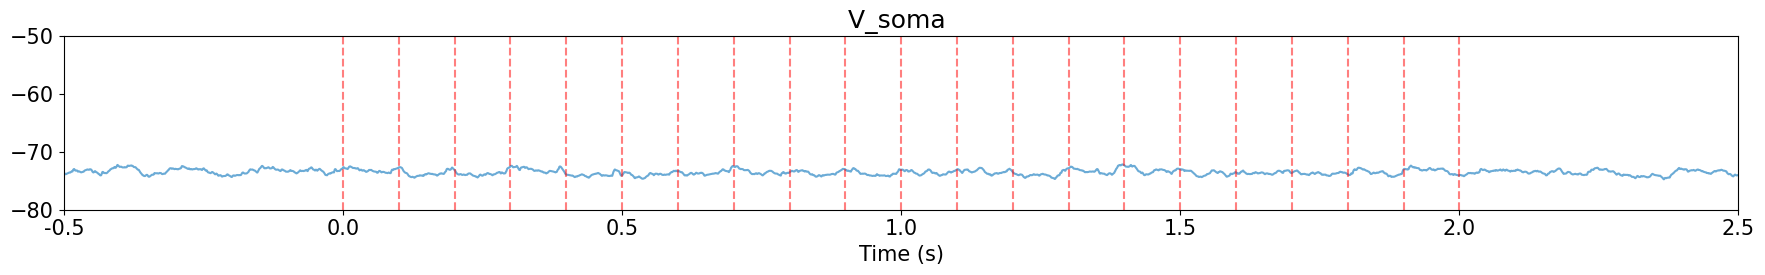

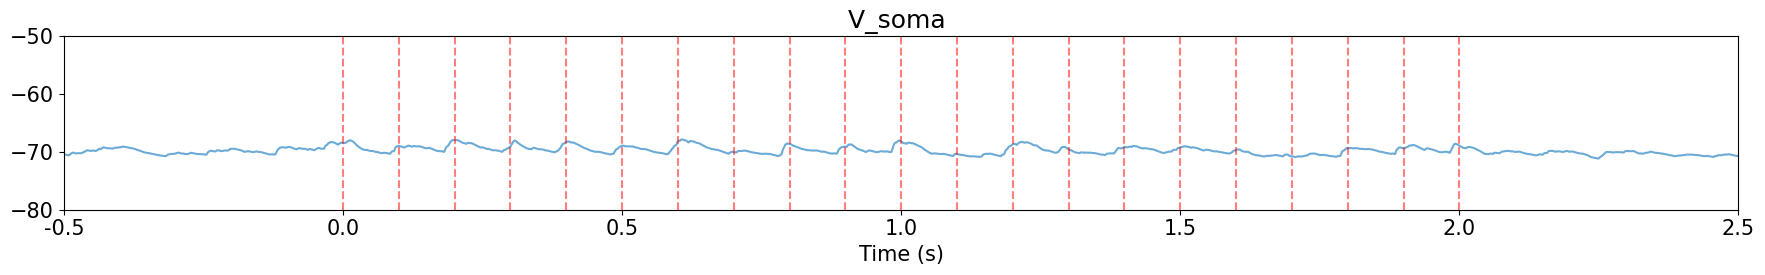

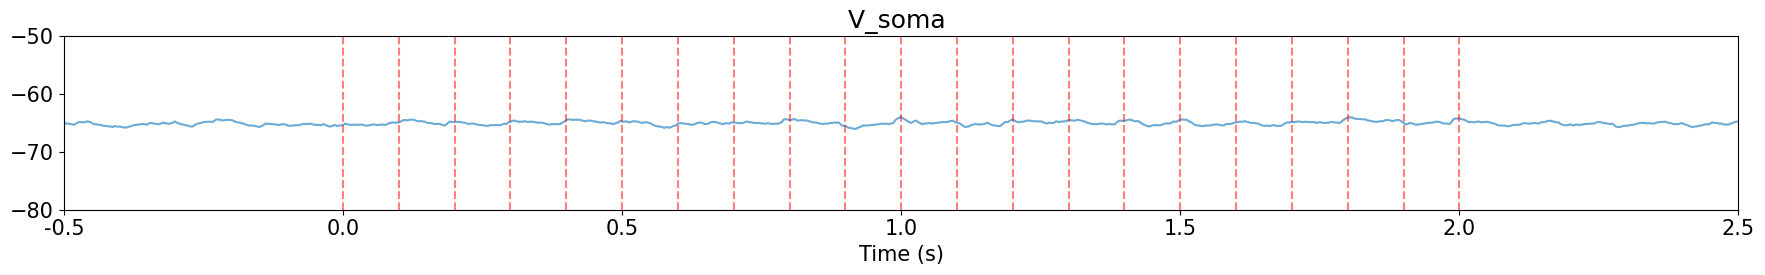

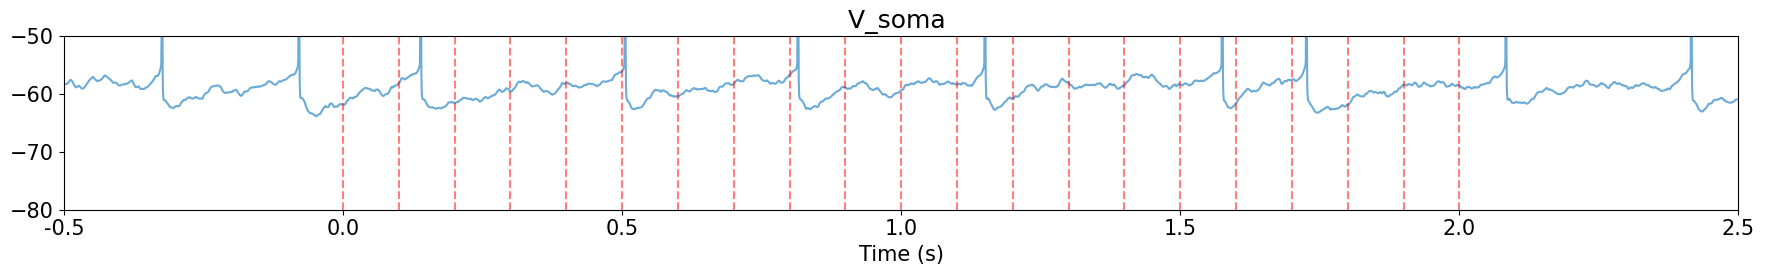

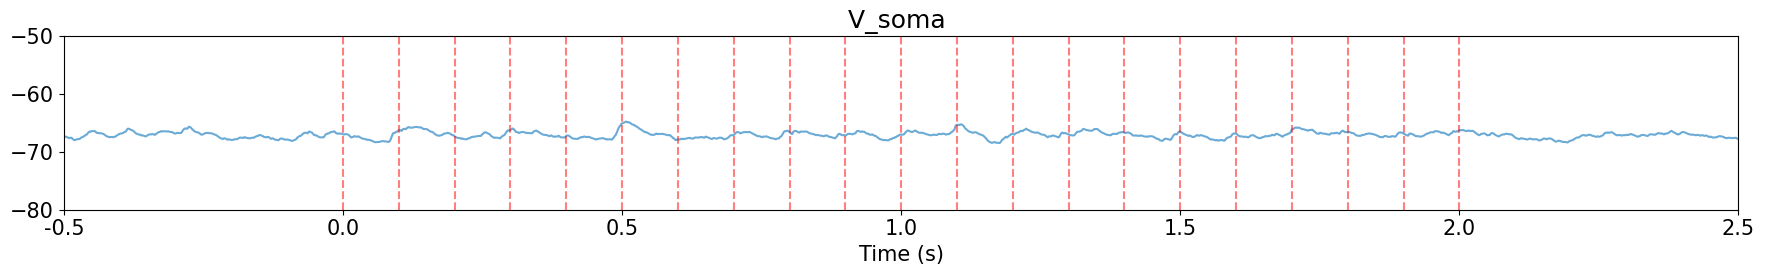

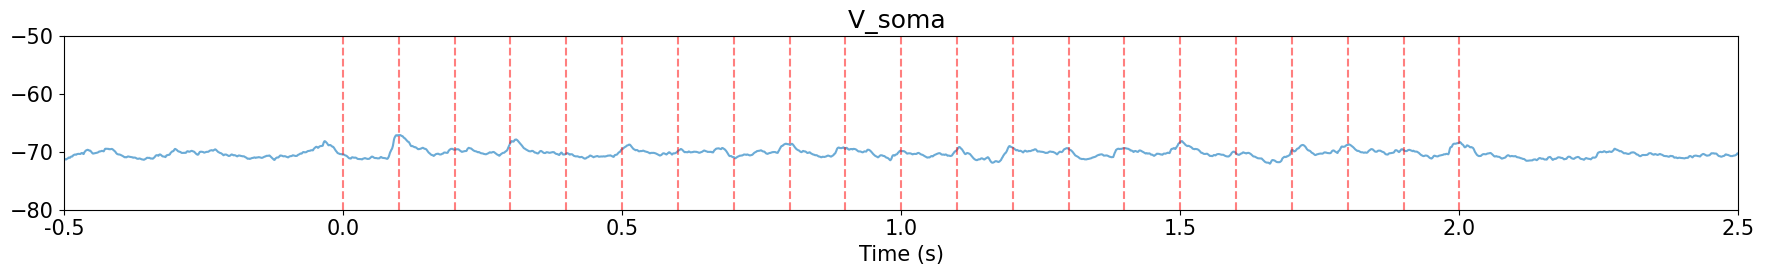

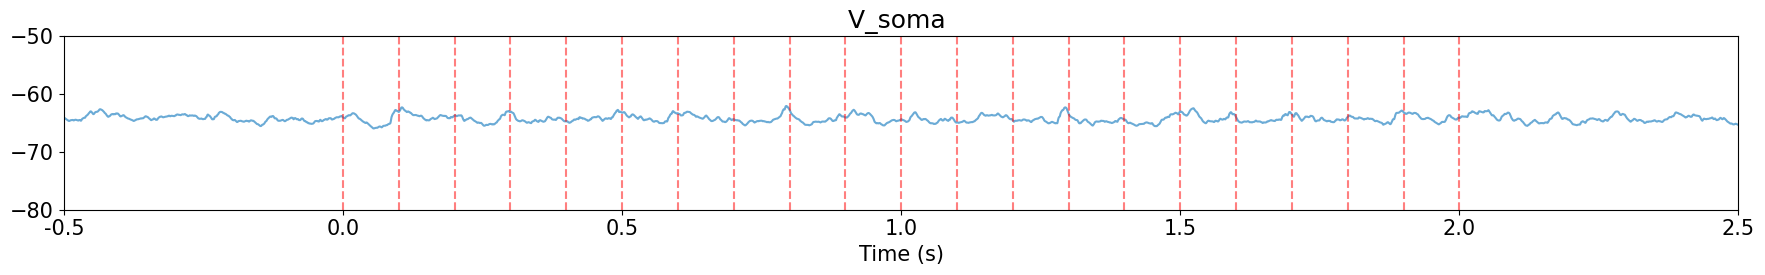

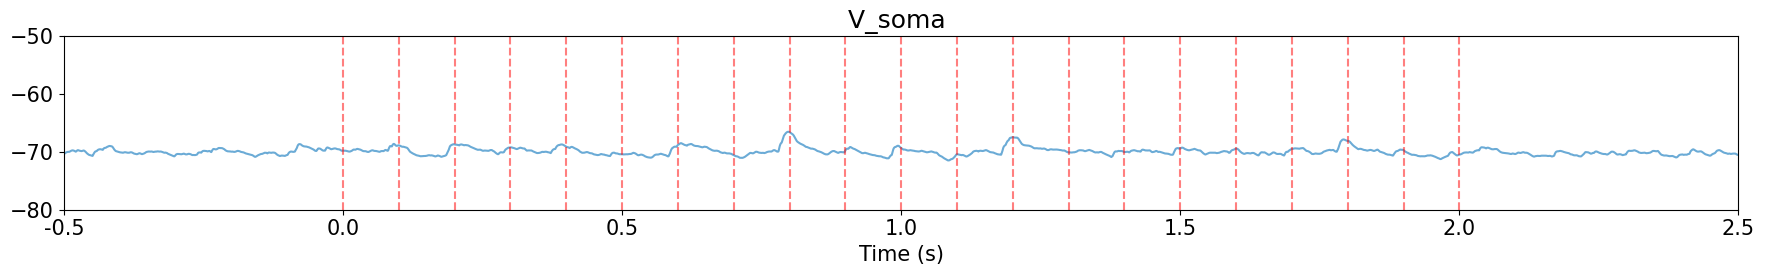

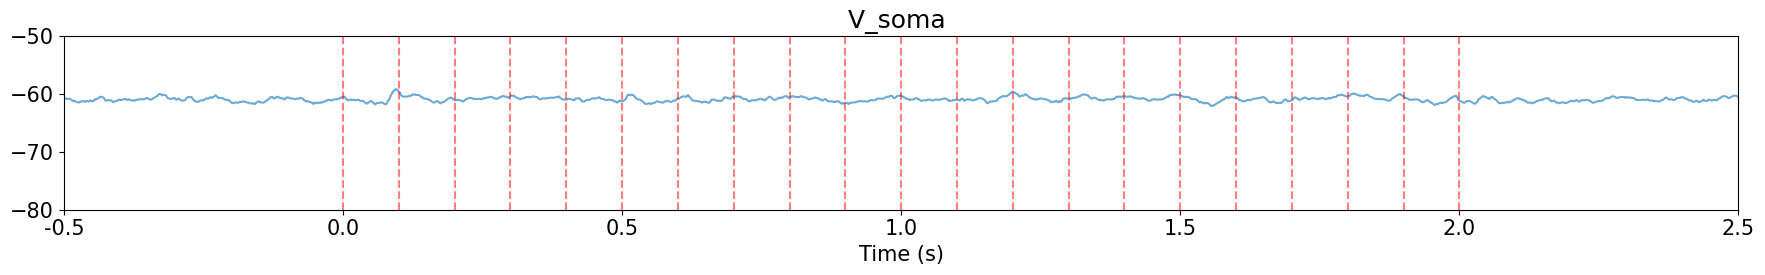

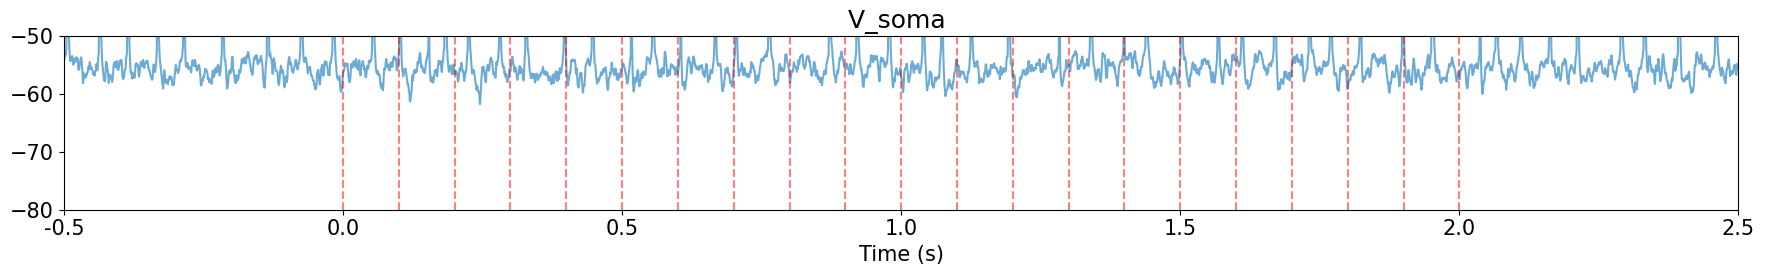

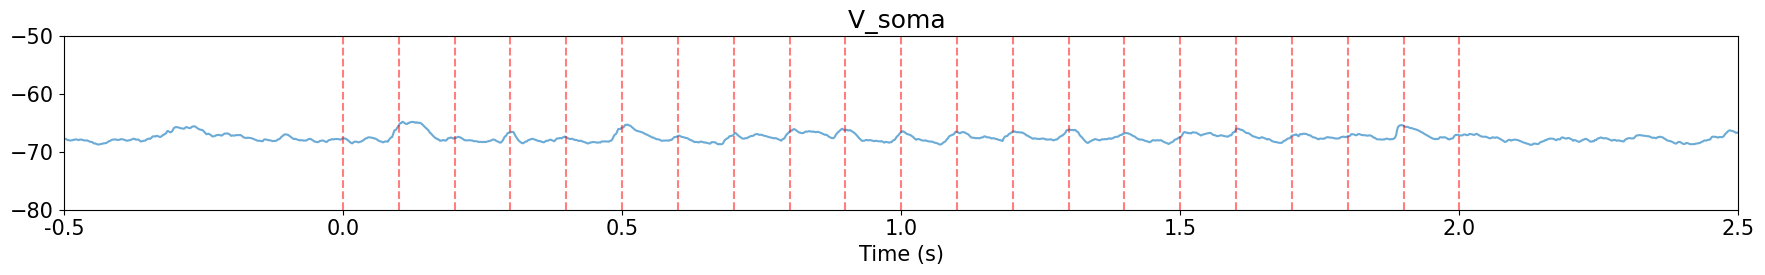

In [7]:
for pop in sim.cfg.S1cells:
    if 'PC' in pop:
        sim.analysis.plotTraces(include= [pop], timeRange=timeRange, overlay=True, oneFigPer='trace', ylim=[-80,-50], subtitles= True, axis=True, scaleBarLoc=1, 
                            figSize=(18, 3), fontSize=15, showFig=False, saveFig=False);
        plt.xlim(2500,5500)
        plt.xlabel('Time (s)')
        plt.vlines(np.linspace(3000,5000,21), ymin=-80,ymax = -50, color='red',linestyles='dashed', alpha =0.5)
        plt.xticks(np.linspace(2500,5500,7),np.linspace(-0.5,2.5,7));

Preparing LFP data...
Plotting LFP time series...
Preparing LFP data...
Plotting LFP time series...


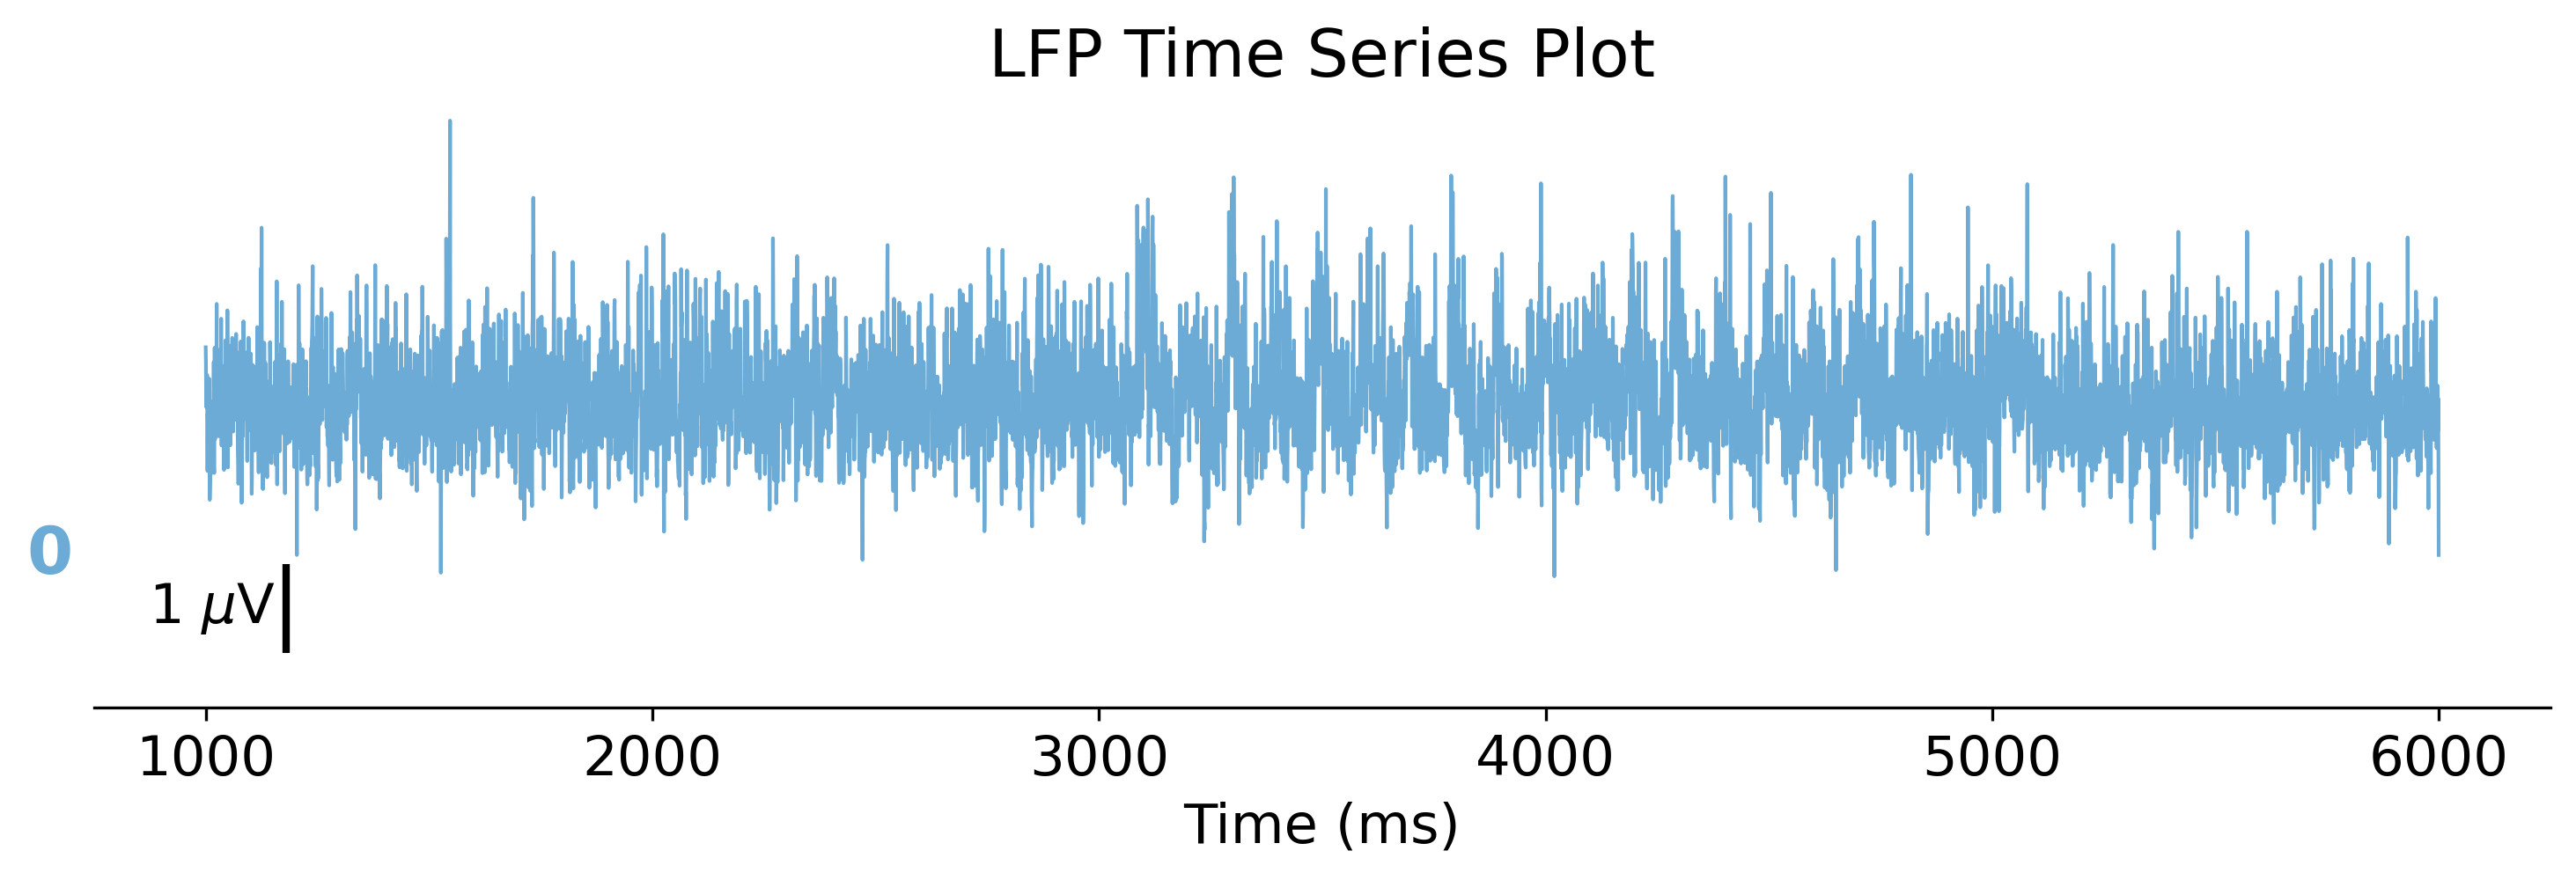

In [14]:
sim.analysis.plotLFP(**{'plots': ['timeSeries'],
                'electrodes': [0], 'lineWidth': 8, 
                # 'filtFreq': [200,400], 'filtOrder': 5,
                # 'timeRange': [6040,6080], 
                'timeRange': [1000,6000], 'dpi':300,
        'figSize': (12.0,3), 'saveFig':False, 'showFig': False})
sim.analysis.plotLFP(**{'plots': ['timeSeries'],
                'electrodes': [0], 'lineWidth': 8, 
                'filtFreq': [4,20], 'filtOrder': 2,
                # 'timeRange': [6040,6080], 
                'timeRange': [1000,6000], 'dpi':300,
        'figSize': (12.0,3), 'saveFig': False, 'showFig': False})

Preparing LFP data...
Preparing spectrogram data...
Plotting LFP spectrogram...
Preparing LFP data...
Preparing spectrogram data...
Plotting LFP spectrogram...
Preparing LFP data...
Preparing spectrogram data...
Plotting LFP spectrogram...
Preparing LFP data...
Preparing spectrogram data...
Plotting LFP spectrogram...


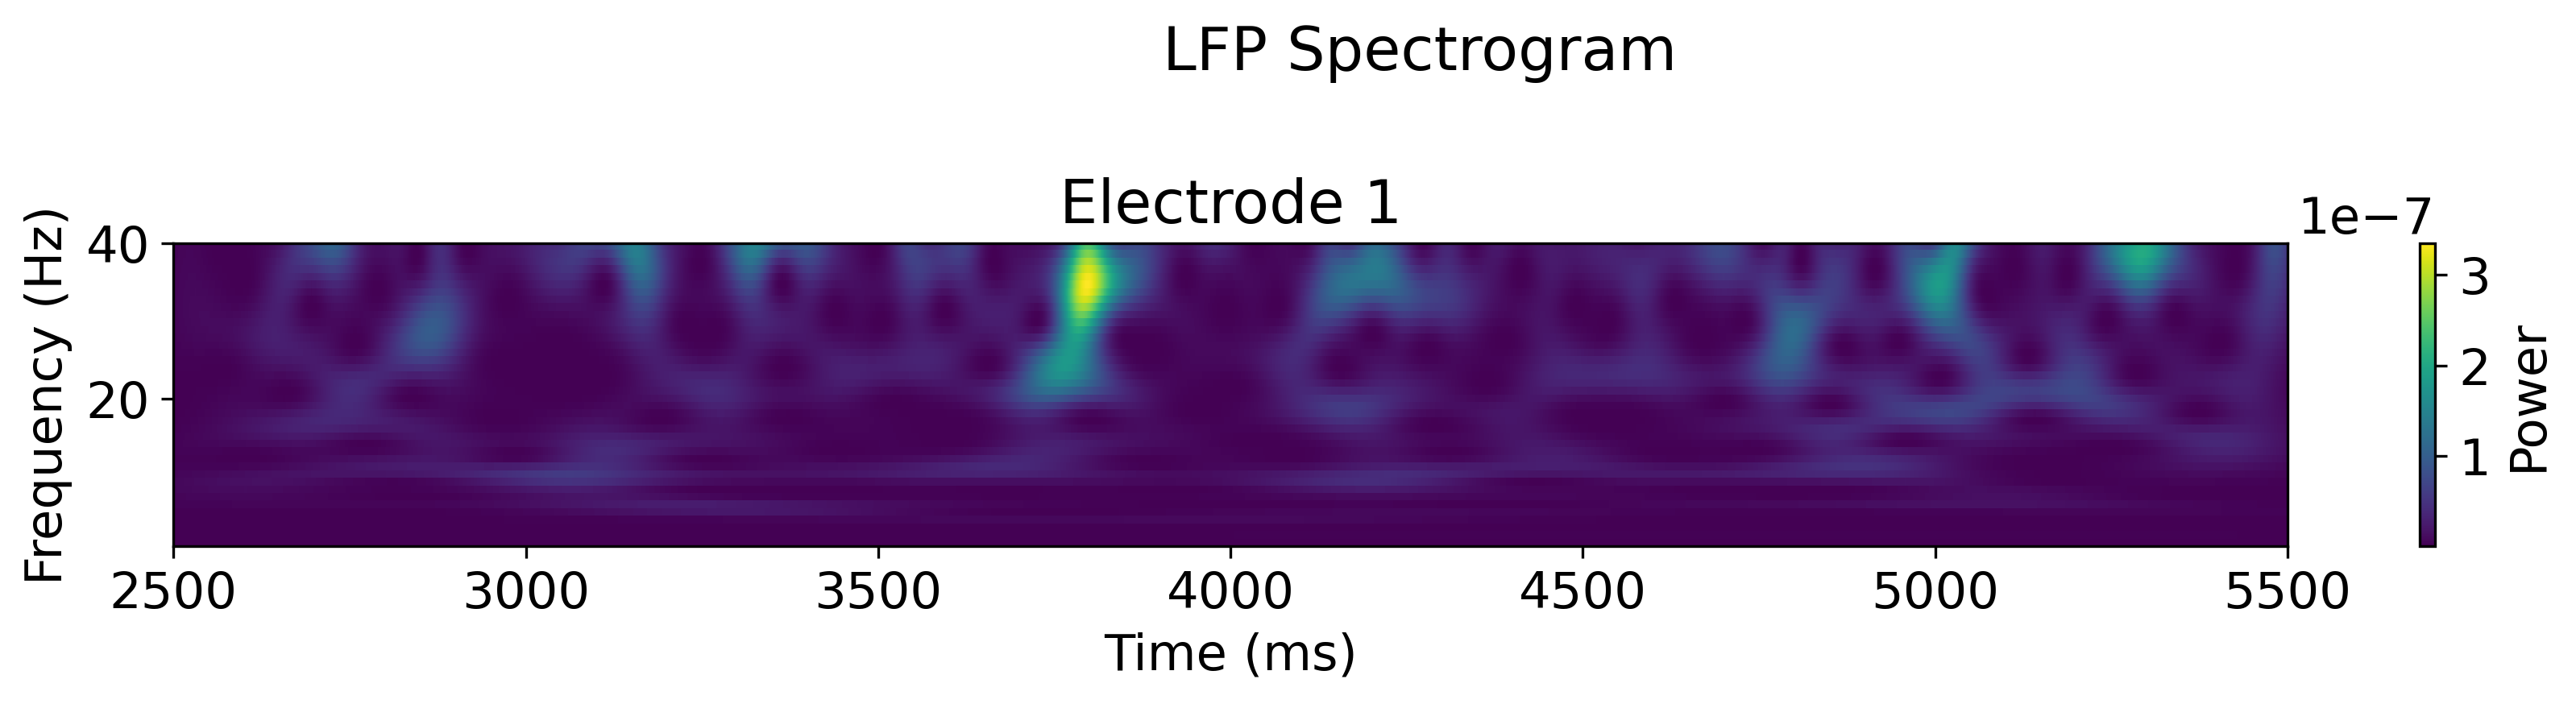

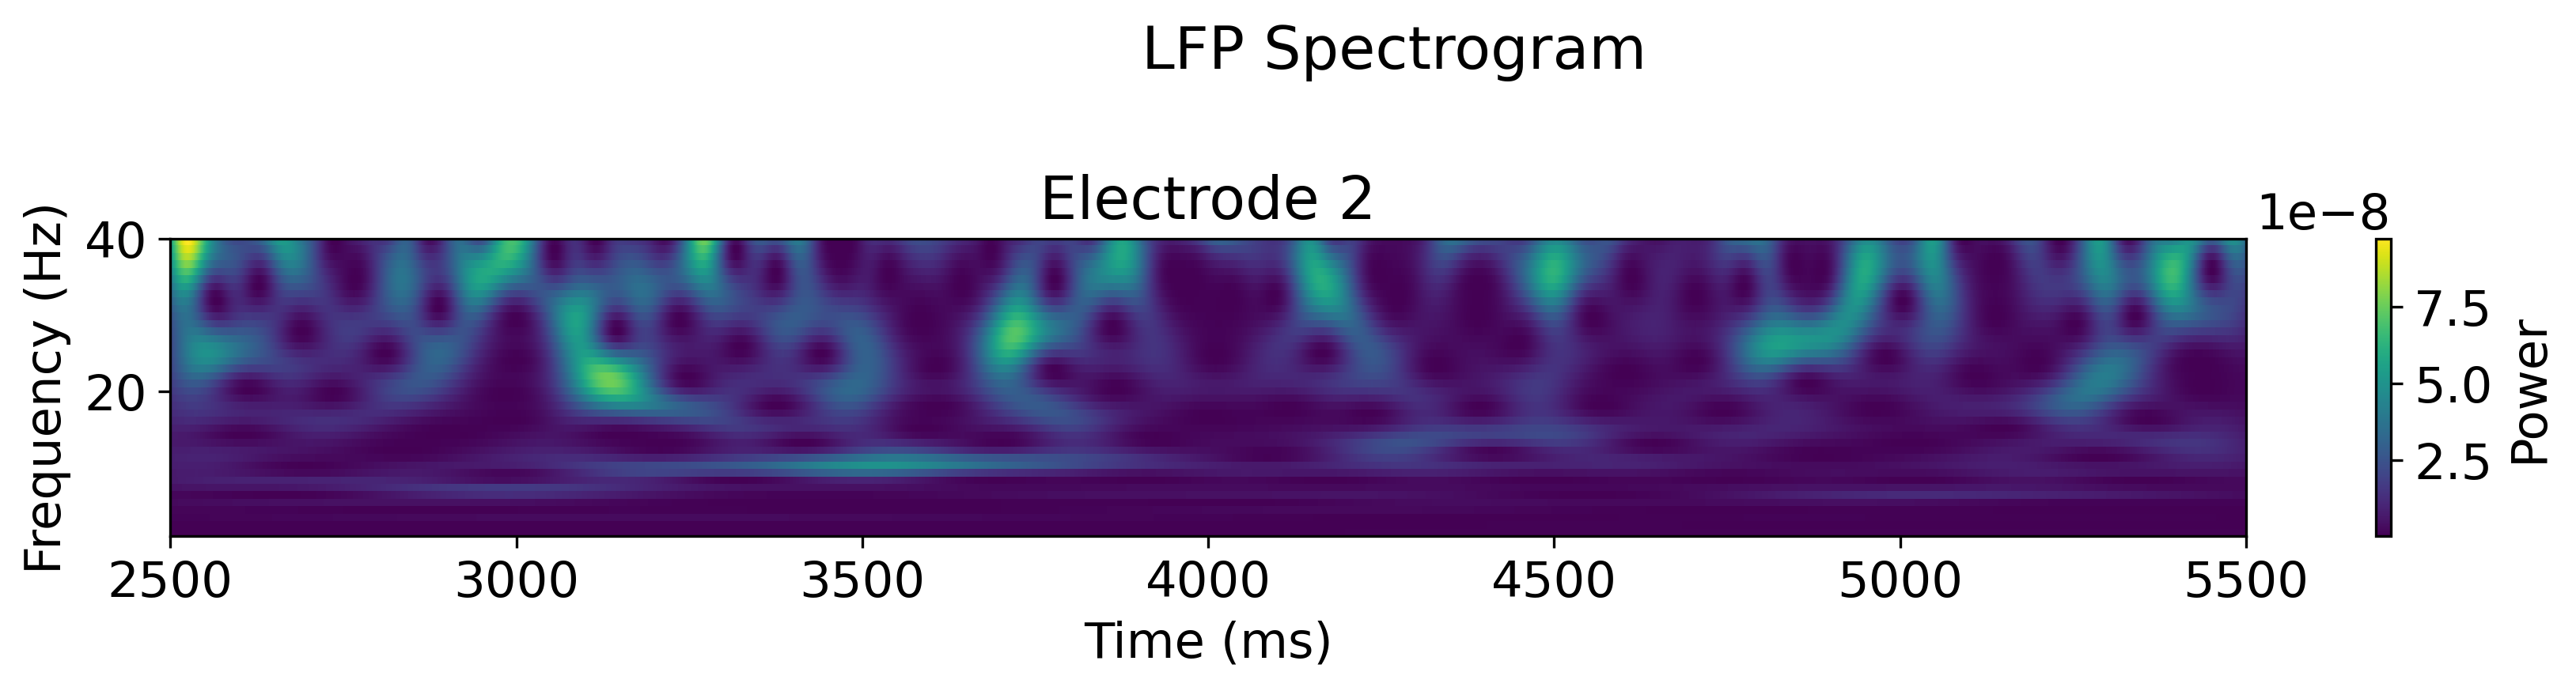

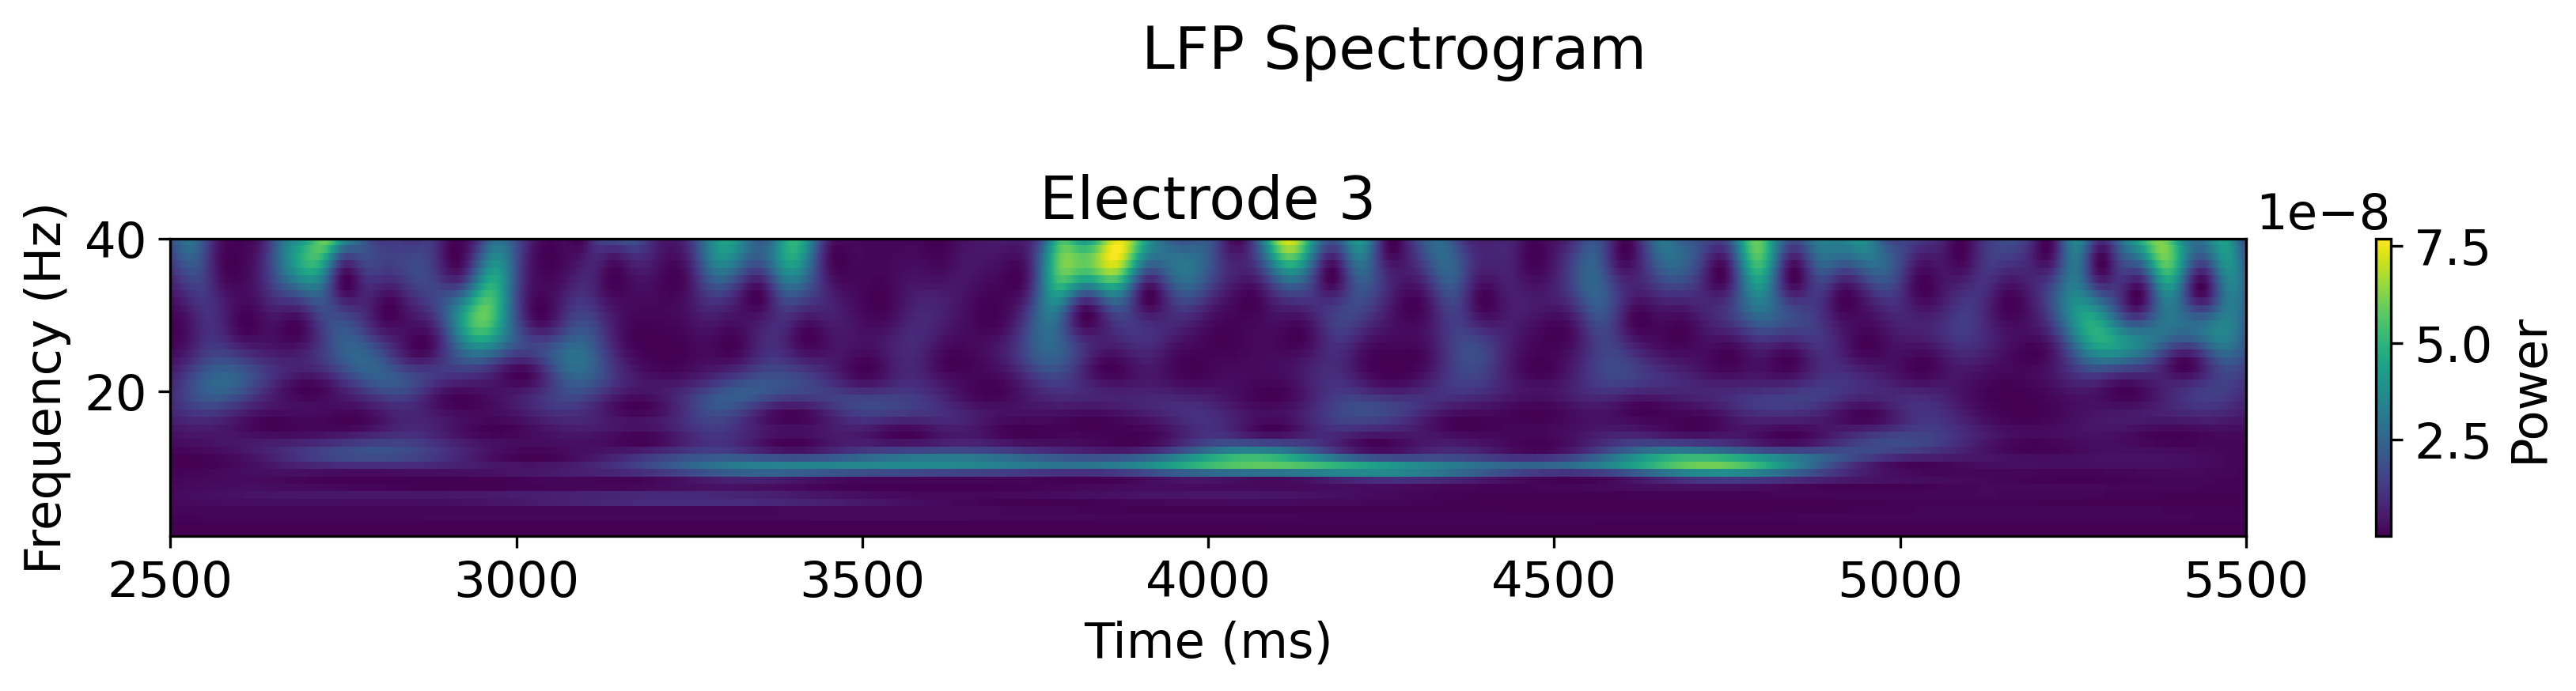

In [15]:
for ii in range(4):
        sim.analysis.plotLFP(**{'electrodes': [ii], 'lineWidth': 8, 'plots': ['spectrogram'],
                # 'filtFreq': [2,20], 'filtOrder': 2,
                'maxFreq': 40,
                'timeRange': [2500,5500], 'dpi':300,
                'figSize': (12.0,3), 'saveFig':False, 'showFig': False})

In [11]:
np.shape(sim.simData['LFP'])

(12000, 4)

Preparing LFP data...
Plotting LFP time series...


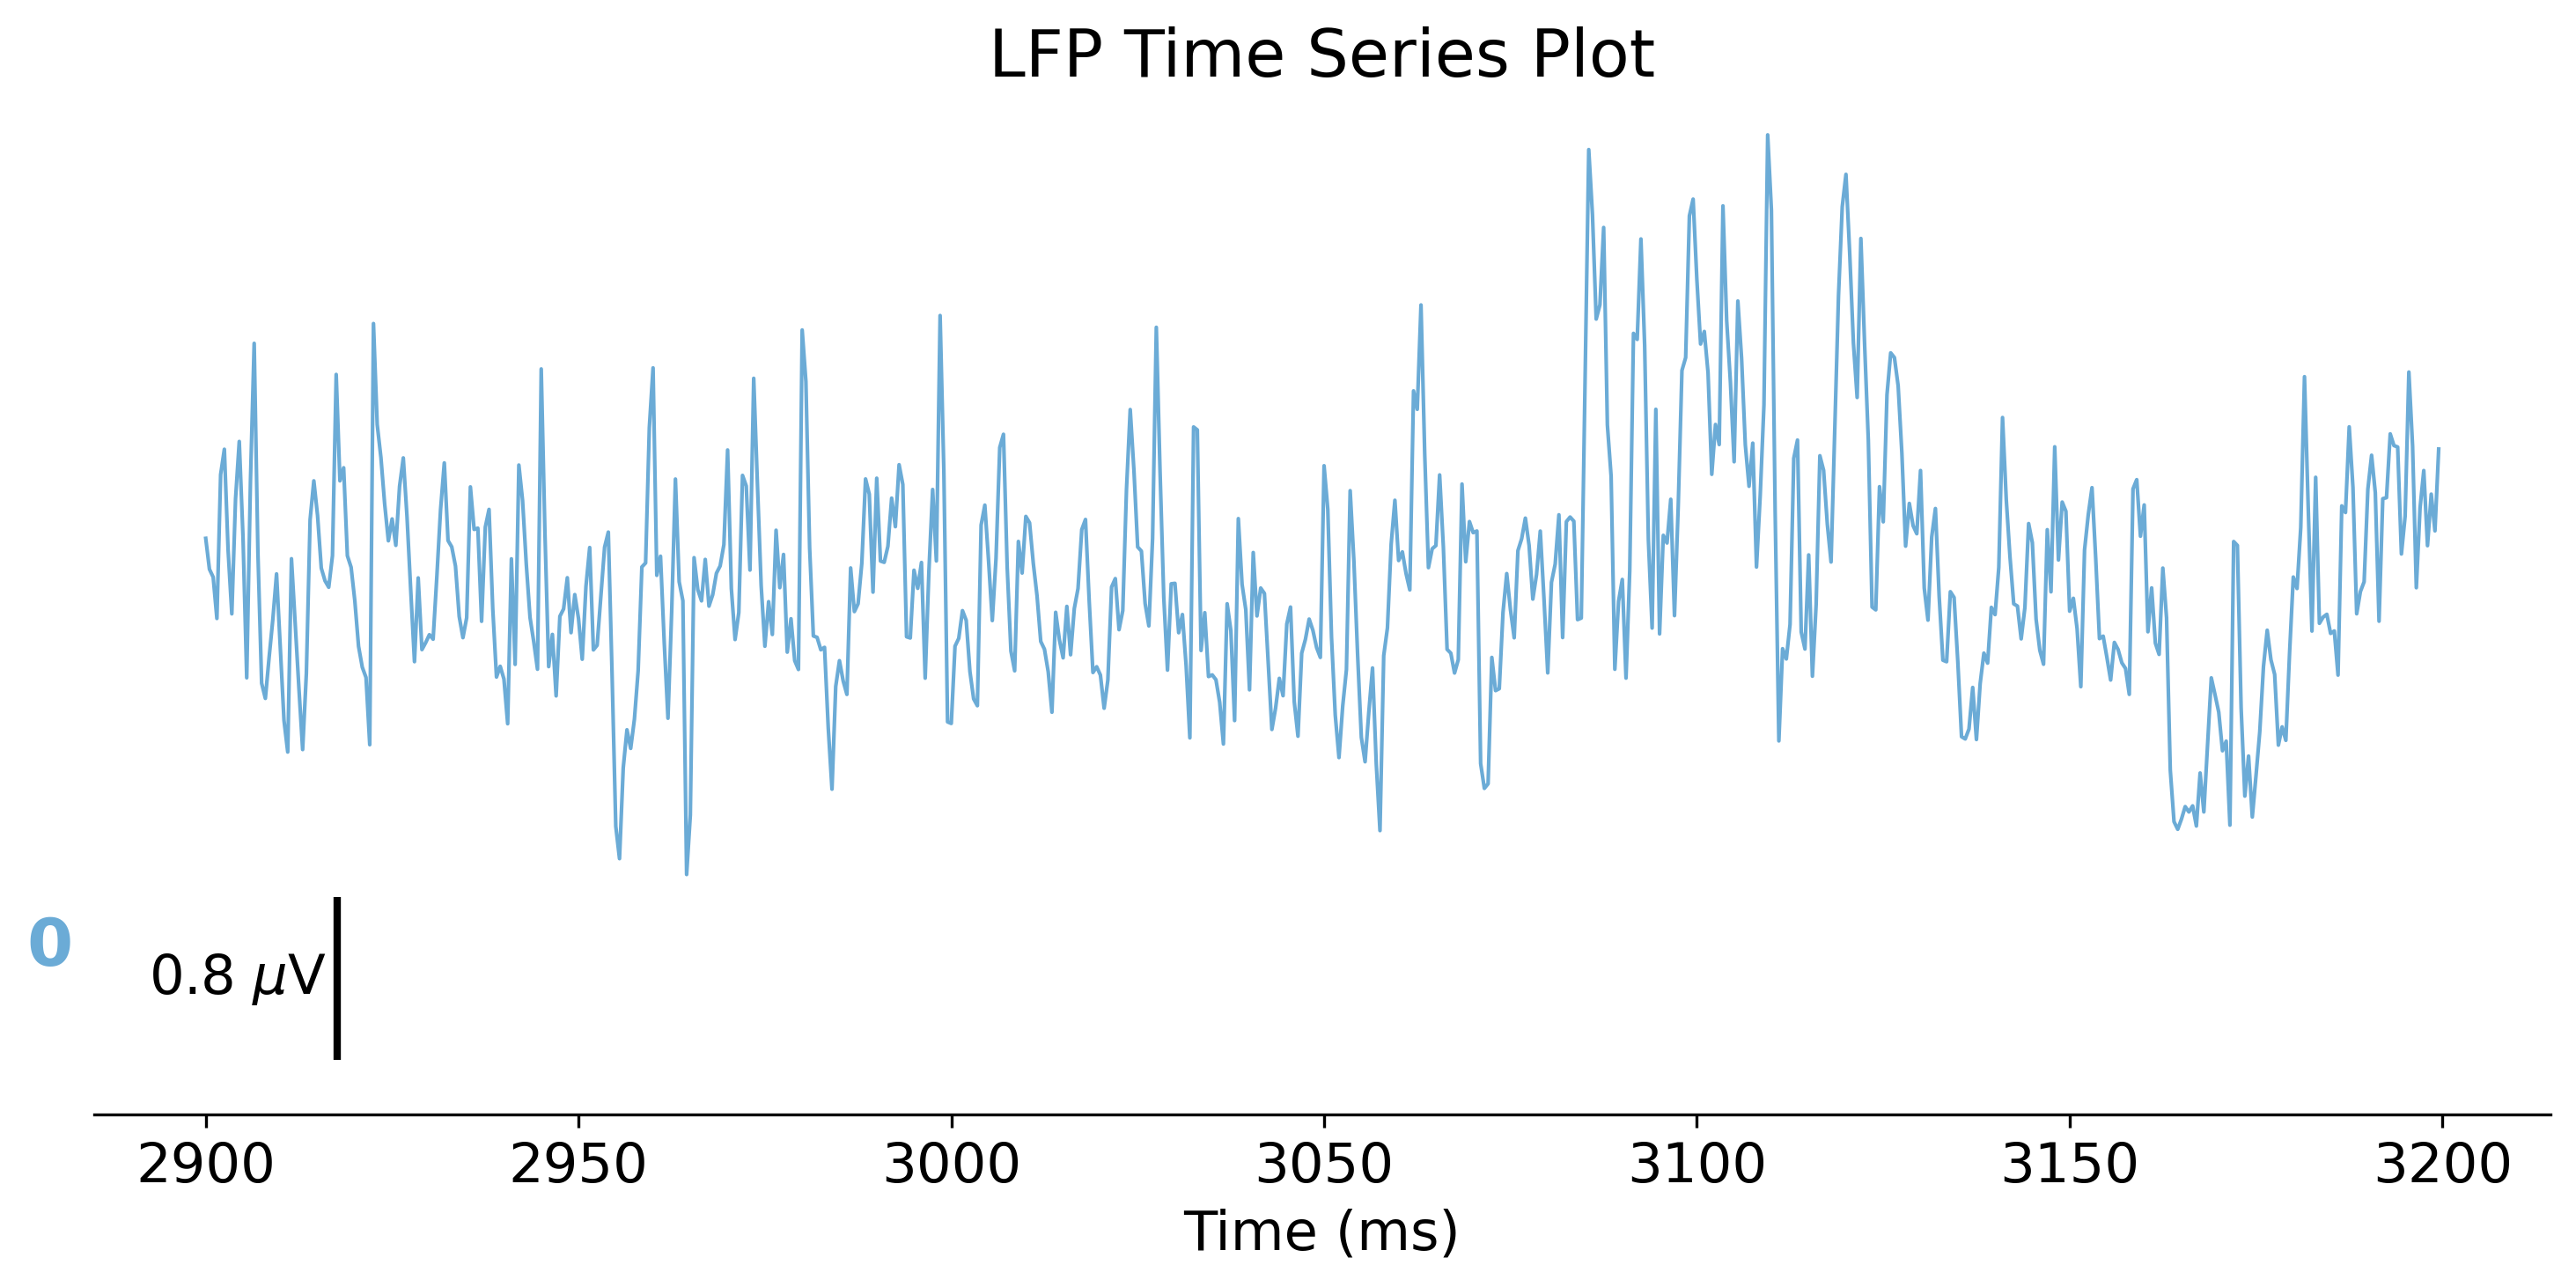

In [12]:
sim.analysis.plotLFP(**{'plots': ['timeSeries'],
                'electrodes': [0], 'lineWidth': 8, 
                # 'filtFreq': [200,400], 'filtOrder': 5,
                # 'timeRange': [6040,6080], 
                'timeRange': [2900,3200], 'dpi':300,
        'figSize': (12.0,5), 'saveFig':False, 'showFig': False})